Dataset saved as 'smart_home_energy.csv'.
Model Performance - RMSE: 0.569, MAE: 0.465


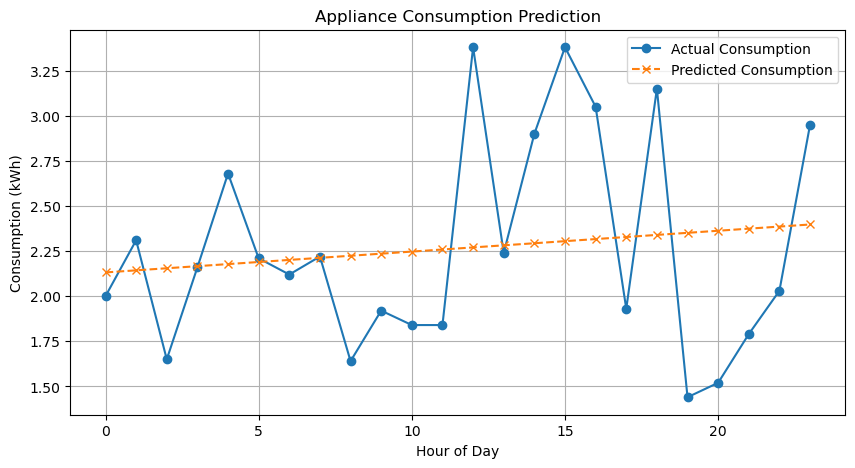


P2P Trading Summary:
            Timestamp  Excess_Solar  Energy_Need  Trading_Amount_$
0 2025-03-01 00:00:00           0.0         2.00               0.0
1 2025-03-01 01:00:00           0.0         2.31               0.0
2 2025-03-01 02:00:00           0.0         1.65               0.0
3 2025-03-01 03:00:00           0.0         2.16               0.0
4 2025-03-01 04:00:00           0.0         2.68               0.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Create sample dataset
data = {
    'Timestamp': pd.date_range(start='2025-03-01 00:00:00', periods=24, freq='H'),
    'Appliance_Consumption_kWh': np.random.uniform(1.0, 3.5, 24).round(2),
    'Solar_Production_kWh': np.concatenate([np.zeros(6), np.random.uniform(0.5, 3.0, 12).round(2), np.zeros(6)]),
}

df = pd.DataFrame(data)
df['Grid_Import_kWh'] = (df['Appliance_Consumption_kWh'] - df['Solar_Production_kWh']).clip(lower=0).round(2)

# Save dataset as CSV
df.to_csv('smart_home_energy.csv', index=False)
print("Dataset saved as 'smart_home_energy.csv'.")

# Step 2: Predict Appliance Consumption (next hour) using Linear Regression
df['Hour'] = df['Timestamp'].dt.hour
X = df[['Hour']]
y = df['Appliance_Consumption_kWh']

model = LinearRegression()
model.fit(X, y)

# Predict for next 24 hours
future_hours = pd.DataFrame({'Hour': list(range(24))})
predictions = model.predict(future_hours)

# Evaluation
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred)).round(3)
mae = mean_absolute_error(y, y_pred).round(3)

print(f"Model Performance - RMSE: {rmse}, MAE: {mae}")

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(df['Hour'], y, label='Actual Consumption', marker='o')
plt.plot(df['Hour'], y_pred, label='Predicted Consumption', linestyle='--', marker='x')
plt.xlabel('Hour of Day')
plt.ylabel('Consumption (kWh)')
plt.title('Appliance Consumption Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Simple P2P Trading Logic
# Homes with excess solar > 1.0 kWh can sell to others
df['Excess_Solar'] = (df['Solar_Production_kWh'] - df['Appliance_Consumption_kWh']).clip(lower=0).round(2)
df['Energy_Need'] = (df['Appliance_Consumption_kWh'] - df['Solar_Production_kWh']).clip(lower=0).round(2)

# Assume trading price = $0.10 per kWh
df['Trading_Amount_$'] = (df[['Excess_Solar', 'Energy_Need']].min(axis=1) * 0.10).round(2)

# Display trading summary
print("\nP2P Trading Summary:")
print(df[['Timestamp', 'Excess_Solar', 'Energy_Need', 'Trading_Amount_$']].head())
